# E2E Classification with NLU 

# 1. Install Java and NLU

In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu

# 2. Download E2E model and predict classes for sample string

In [2]:
import nlu
sarcasm_pipe  = nlu.load('e2e')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,category,sentence,sentence_embeddings,category_confidence
origin_index,,,,
0,name[The Dumpling Tree],gotta love the teachers who give exams on the ...,"[-0.05071105435490608, 0.038035523146390915, 0...",0.724468
0,eatType[restaurant],None,None,0.724468
0,customer rating[5 out of 5],None,None,0.724468
0,food[Fast food],None,None,0.724468


# 3. Download Dataset

In [3]:
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2020-09-15 14:25:48--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.59
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  53.0MB/s    in 4.6s    

2020-09-15 14:25:53 (52.9 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



# 4. Predict on pandas dataset and visualize predictions


In [4]:
sarcasm_pipe  = nlu.load('e2e')
df['text'] = df['comment']
sarcasm_predictions = sarcasm_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
sarcasm_predictions

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,category,sentence,sentence_embeddings,category_confidence
origin_index,,,,
0,eatType[restaurant],NC and NH.,"[-0.06570463627576828, -0.03522053360939026, -...",0.859201
0,priceRange[moderate],None,None,0.859201
0,food[English],None,None,0.859201
1,name[Wildwood],You do know west teams play against west teams...,"[-0.0254225991666317, 0.05448468029499054, -0....",0.829274
1,near[Ranch],None,None,0.829274
...,...,...,...,...
998,area[riverside],None,None,0.902405
998,familyFriendly[no],None,None,0.902405
998,familyFriendly[yes],None,None,0.902405


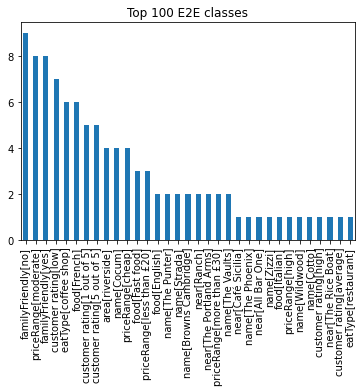

In [8]:
sarcasm_predictions.explode('category').category.iloc[0:100].value_counts().plot.bar(title='Top 100 E2E classes')